In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [2]:
df_customers = pd.read_csv('dataset/customers.csv')
df_loans = pd.read_csv('dataset/loans.csv')
df_bureau = pd.read_csv('dataset/bureau_data.csv')

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [5]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [6]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [7]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [8]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default'] = df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
X = df.drop(['default'], axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [12]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [13]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [17]:
mode_residence = df_train['residence_type'].mode()[0]
df_train['residence_type'].fillna(mode_residence, inplace=True)

In [18]:
df_train.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [19]:
df_test.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 15
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [20]:
df_test['residence_type'].fillna(mode_residence, inplace=True)

In [22]:
df_train.duplicated().sum()

0

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 12746 to 37784
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      37500 non-null  object 
 1   age                          37500 non-null  int64  
 2   gender                       37500 non-null  object 
 3   marital_status               37500 non-null  object 
 4   employment_status            37500 non-null  object 
 5   income                       37500 non-null  int64  
 6   number_of_dependants         37500 non-null  int64  
 7   residence_type               37500 non-null  object 
 8   years_at_current_address     37500 non-null  int64  
 9   city                         37500 non-null  object 
 10  state                        37500 non-null  object 
 11  zipcode                      37500 non-null  int64  
 12  loan_id                      37500 non-null  object 
 13  loan_purpose     

In [28]:
numerical_cols = df_train.select_dtypes(['int64','int32', 'float64']).columns
categorical_cols = df_train.select_dtypes('object').columns

In [31]:
len(numerical_cols)

21

In [29]:
categorical_cols

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

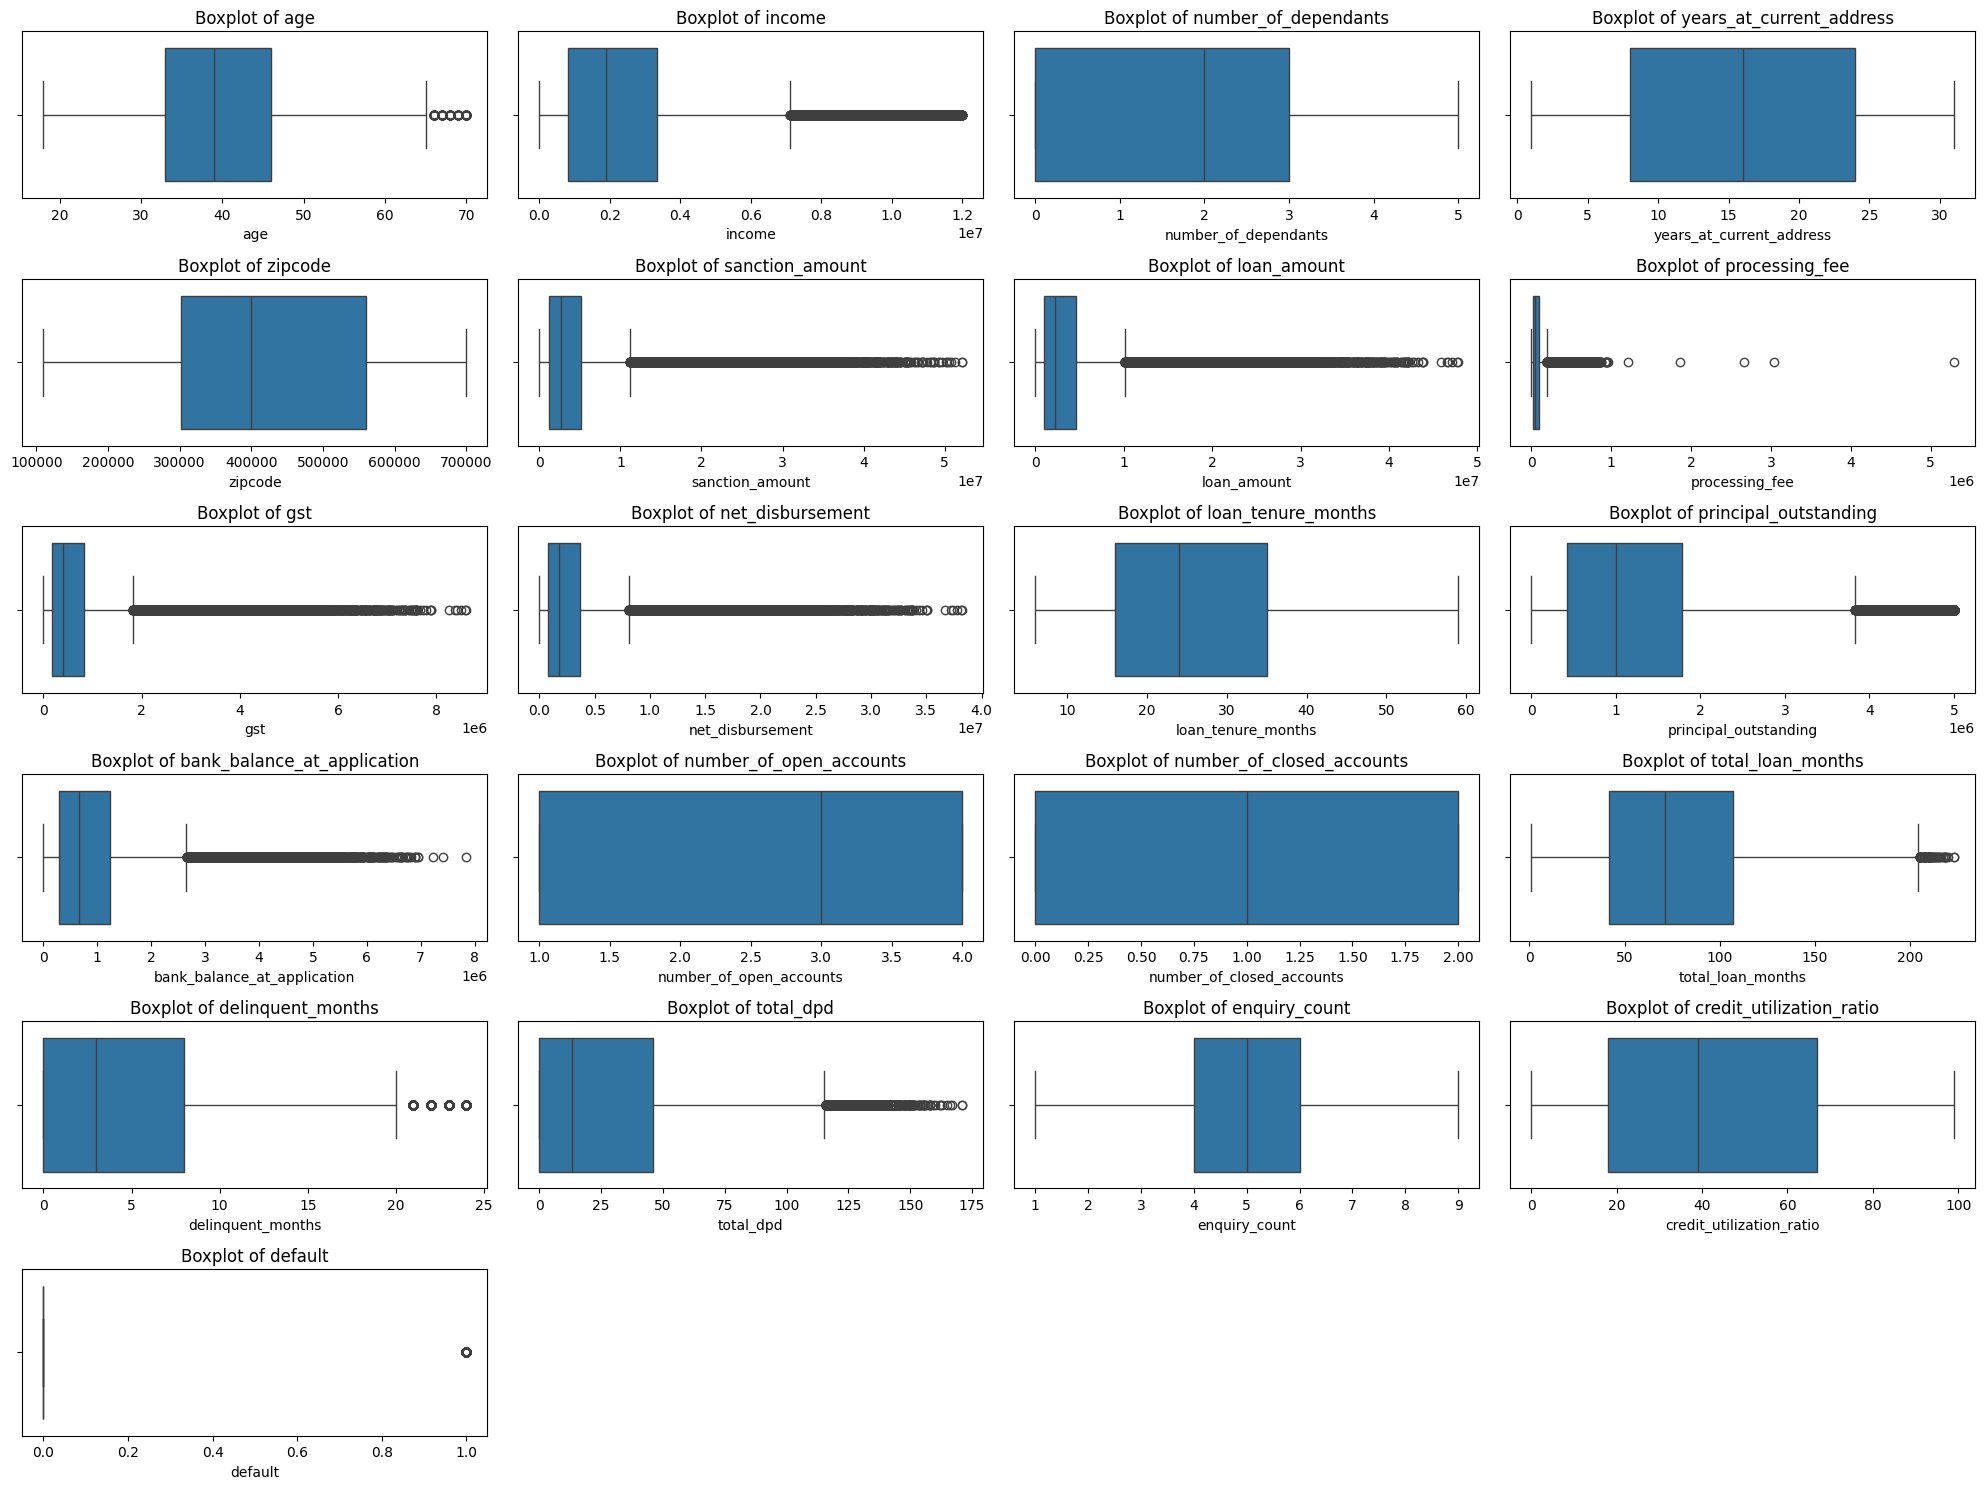

In [35]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i , col in enumerate(numerical_cols):
    sns.boxplot(df_train, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

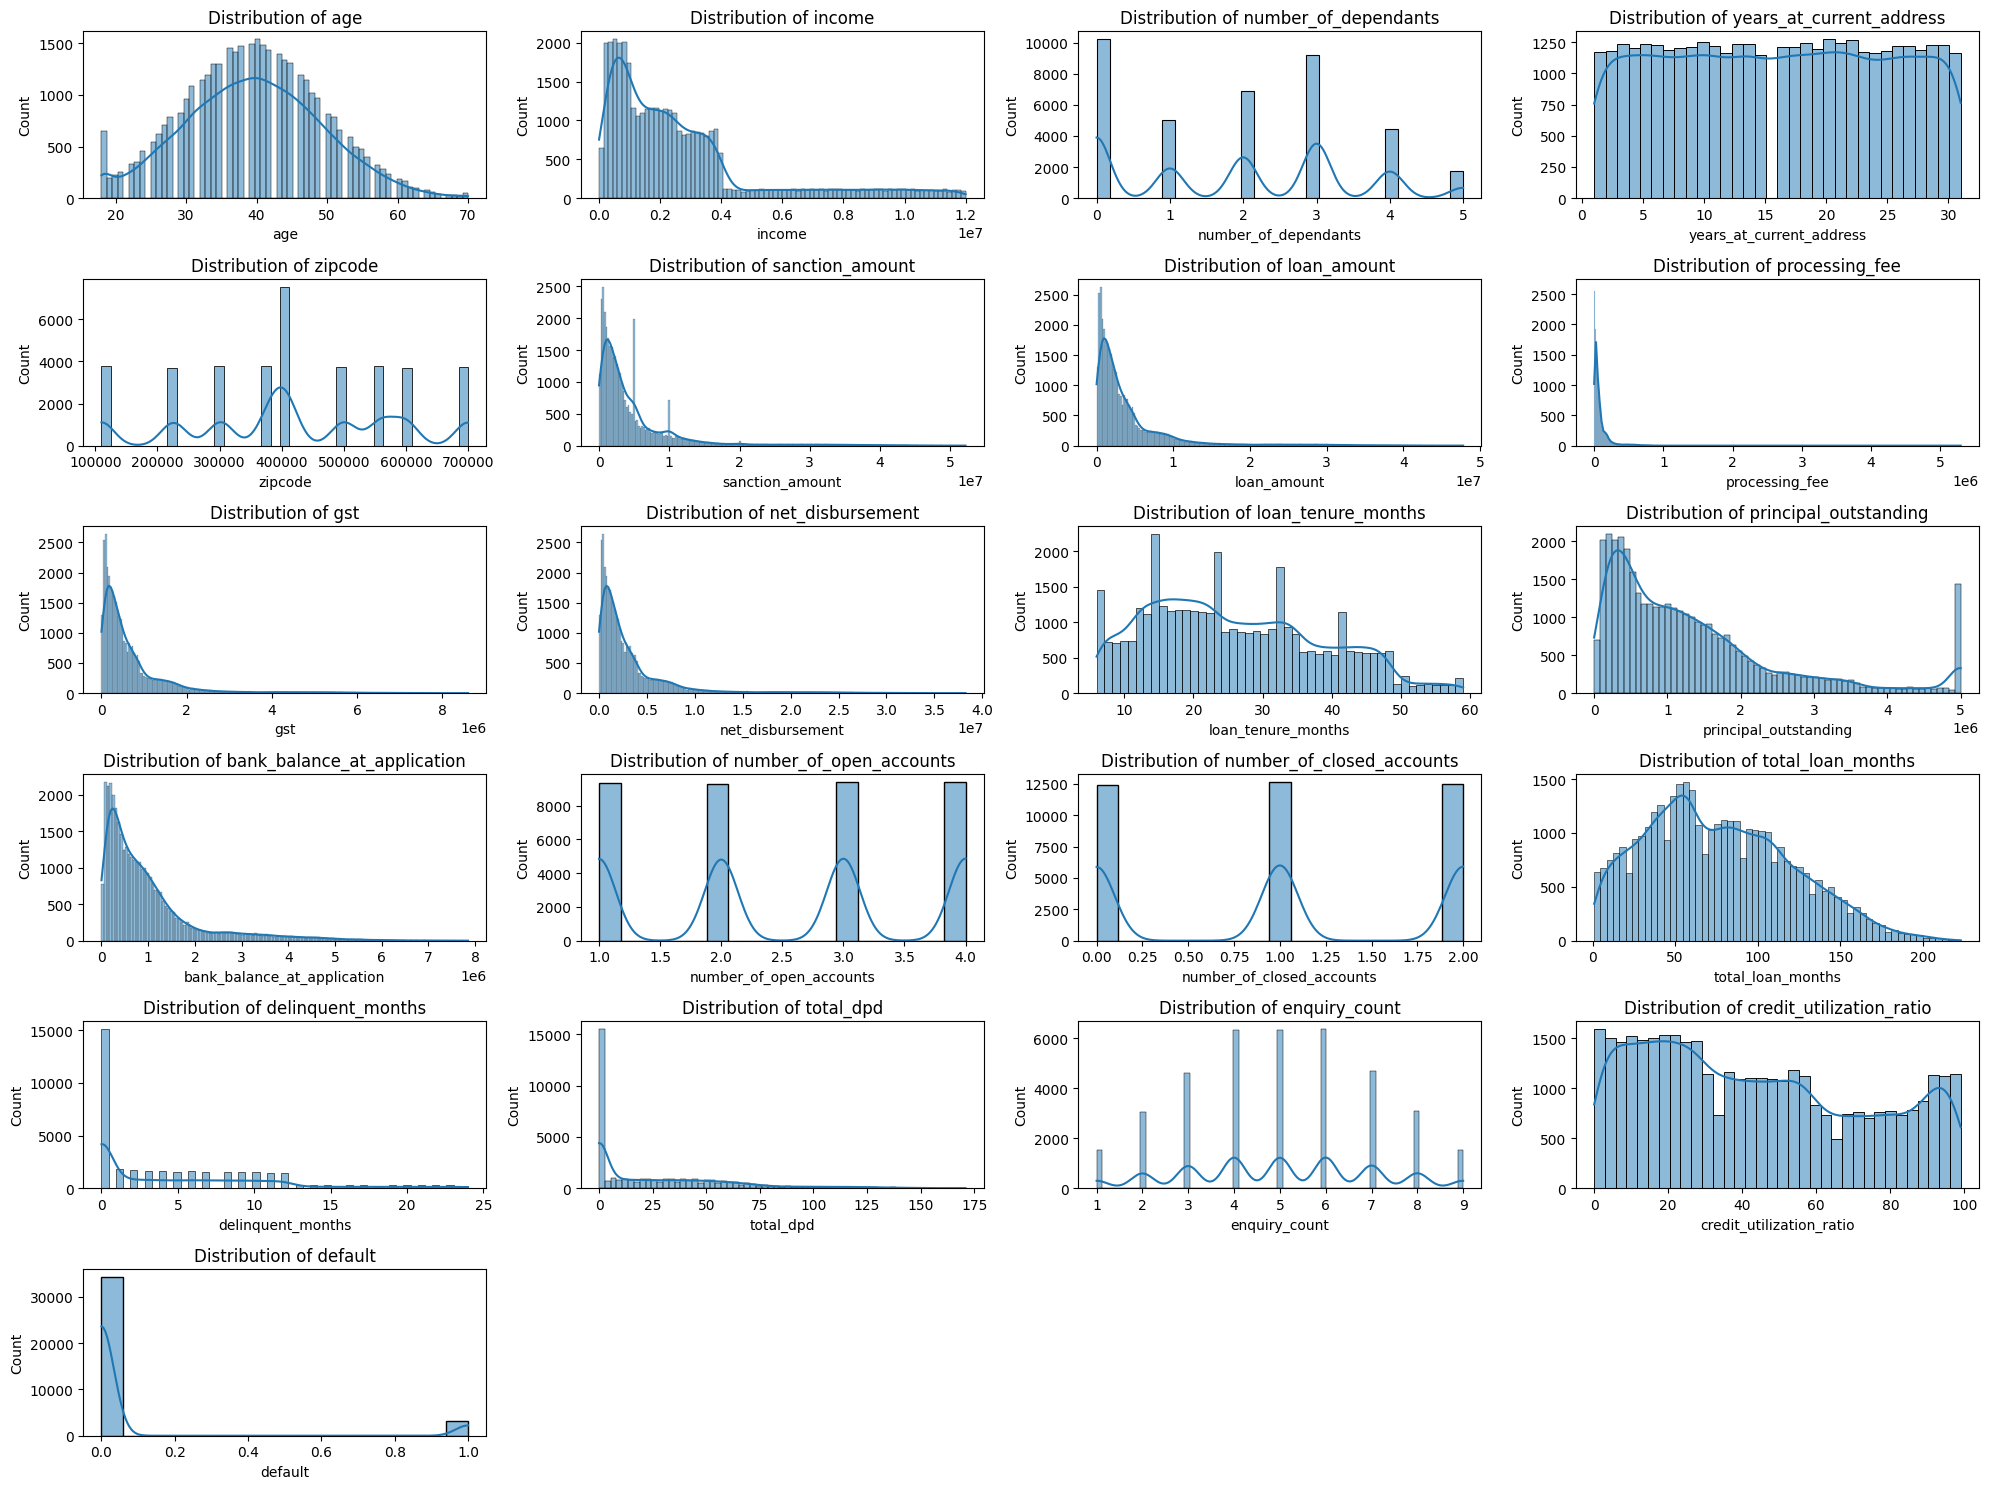

In [36]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i , col in enumerate(numerical_cols):
    sns.histplot(df_train, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [37]:
df_train['processing_fee'].describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [44]:
df_train[(df_train['processing_fee'] / df_train['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [45]:
df_train1 = df_train[(df_train['processing_fee'] / df_train['loan_amount']) < 0.03].copy()

In [46]:
df_train1[(df_train1['processing_fee'] / df_train1['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [47]:
df_test[(df_test['processing_fee'] / df_test['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
33705,3812000,5678020.86
12294,4639000,5698029.90


In [48]:
df_test1 = df_test[(df_test['processing_fee'] / df_test['loan_amount']) < 0.03].copy()

In [49]:
df_test1[(df_test1['processing_fee'] / df_test1['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [51]:
for col in categorical_cols:
    print(col, '--> ', df_train1[col].unique())

cust_id -->  ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
gender -->  ['M' 'F']
marital_status -->  ['Married' 'Single']
employment_status -->  ['Self-Employed' 'Salaried']
residence_type -->  ['Owned' 'Mortgage' 'Rented']
city -->  ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state -->  ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_id -->  ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
loan_purpose -->  ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type -->  ['Secured' 'Unsecured']
disbursal_date -->  ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
installment_start_dt -->  ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' '2019-07-28'
 '2019-07-25']


In [55]:
df_train1['loan_purpose'].replace('Personaal', 'Personal', inplace=True)
df_test1['loan_purpose'].replace('Personaal', 'Personal', inplace=True)

In [56]:
print('Train --> ', df_train1['loan_purpose'].unique())
print('Test --> ', df_test1['loan_purpose'].unique())


Train -->  ['Home' 'Education' 'Personal' 'Auto']
Test -->  ['Home' 'Education' 'Auto' 'Personal']
